<a href="https://colab.research.google.com/github/ObadaHussein/Time_series_forecasting_TensorFlow/blob/main/Time_series_forecasting_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi 

Sun Mar 12 18:44:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    32W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Get Data 

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-03-12 18:44:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.004s  

2023-03-12 18:44:31 (40.9 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
# Import with pandas 
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", 
                 parse_dates=["Date"], 
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
len(df)

2787

In [ ]:
# Only want closing price for each day 
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head(10)

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866
2013-10-06,120.65533
2013-10-07,121.79500
2013-10-08,123.03300
2013-10-09,124.04900


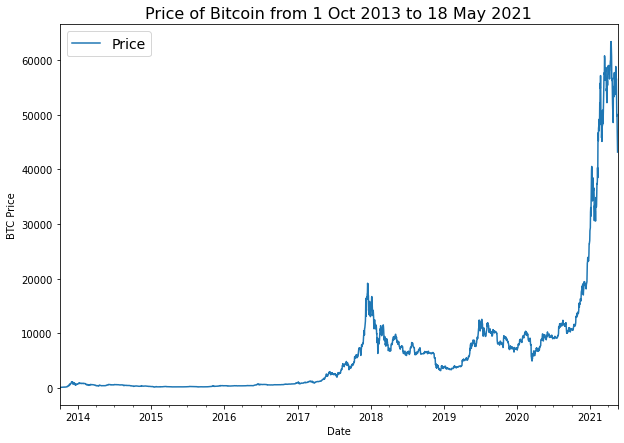

In [ ]:

import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

#Importing time series data with Python's CSV module


In [ ]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_reader = csv.reader(f,delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))



#view first 10 of each 
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

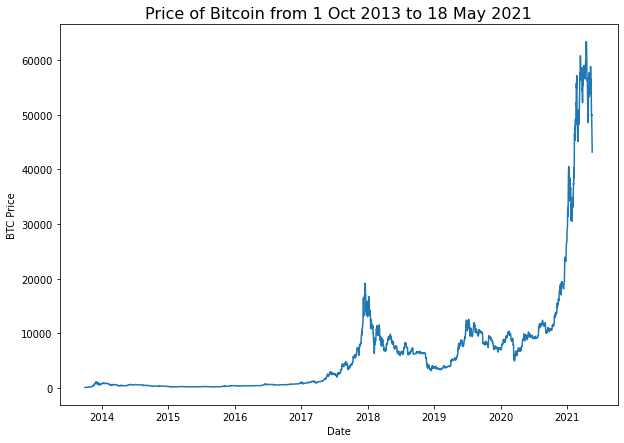

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

# Format Data Part 1: Creatining train and test sets for time series data


## Create train & test sets for time series (the wrong way)


In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((2229,), (558,), (2229,), (558,))

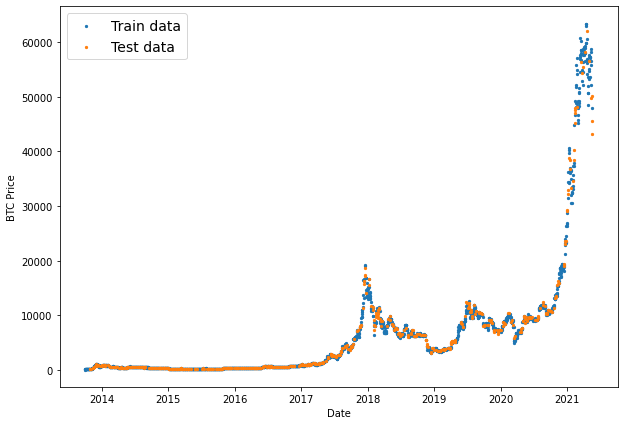

In [ ]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

## Create train & test sets for time series (the right way)


In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

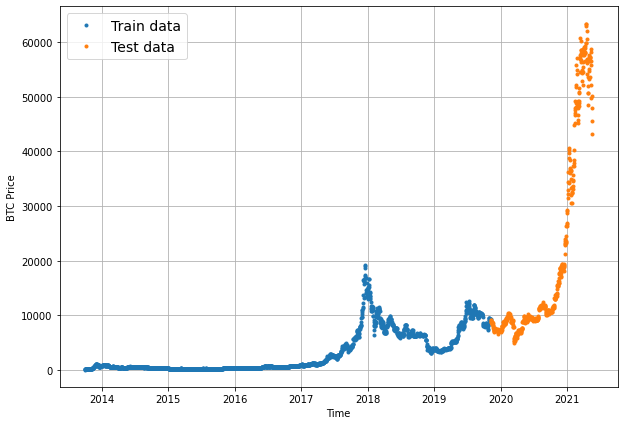

In [ ]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Create a plotting function


In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

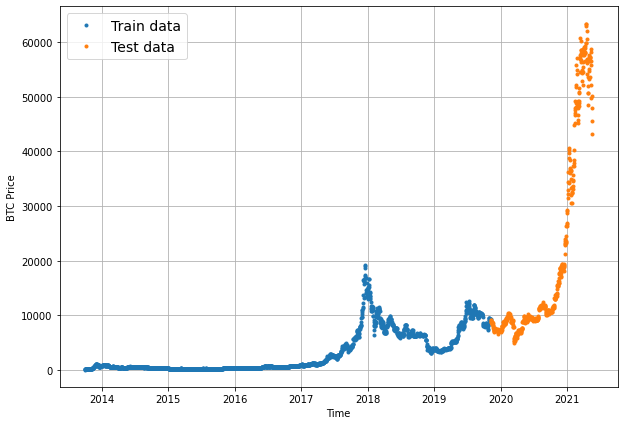

In [ ]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

# Modelling Experiments


## Model 0: Naïve forecast (baseline)


In [ ]:
#create the aive forecast 
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [ ]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

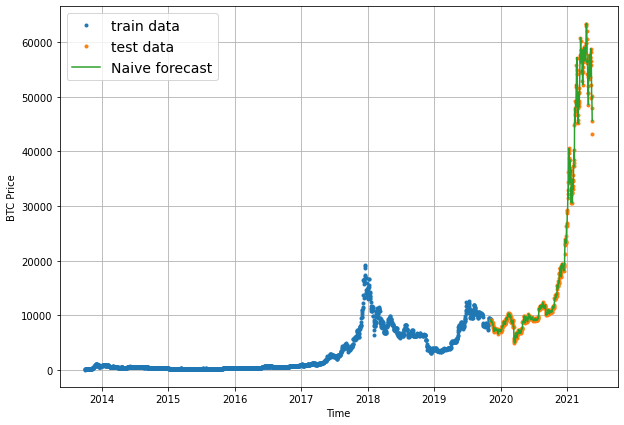

In [ ]:
#plot naive forecast 
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label = "train data ")
plot_time_series(timesteps=X_test , values=y_test , label= "test data ")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");


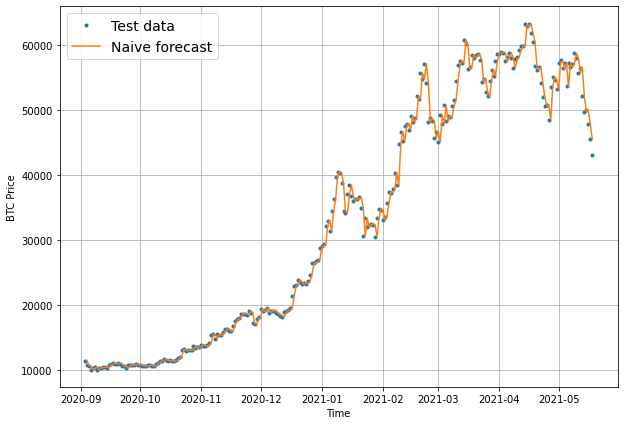

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

### Evaluating a time series model


In [ ]:
import tensorflow as tf

In [ ]:
#MASE implementation 
def mean_absolute_Scaled_error (y_true, y_pred):
  """
  implement MASE (assuming no seasonality of data )
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  #find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season


In [ ]:
mean_absolute_Scaled_error(y_true = y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_Scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred = naive_forecast)

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

### Format Data Part 2: Windowing dataset
Windowing is a method to turn a time series dataset into **supervised learning problem.**



In [ ]:
# what we wanna do with our data 
print(f"We want to use : {btc_price[:7]} to predict this : {btc_price[7]}")

We want to use : [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this : 123.033


In [ ]:
# lets setup global variables for window and horizon prediction
HORIZON = 1 
WINDOW_SIZE = 7

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]
     

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)
     

(2780, 2780)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


###Turning windows into training and test sets


In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]


(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

### Make a modelling checkpoint

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

## Model 1: Dense model (window = 7, horizon = 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128,activation = "relu"),
    layers.Dense(HORIZON)
], name="model_1_dense")

#compile the model 
model_1.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae"])

#fit the model 
model_1.fit(x = train_windows,
            y = train_labels,
            epochs= 100,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks = [create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 1258.4012 - mae: 1258.4012  

18/18 [==============================] - 8s 89ms/step - loss: 982.0797 - mae: 982.0797 - val_loss: 2591.1218 - val_mae: 2591.1218
Epoch 2/100
13/18 [====================>.........] - ETA: 0s - loss: 298.9397 - mae: 298.9397

18/18 [==============================] - 1s 53ms/step - loss: 279.3124 - mae: 279.3124 - val_loss: 1081.8734 - val_mae: 1081.8734
Epoch 3/100
12/18 [===================>..........] - ETA: 0s - loss: 208.6754 - mae: 208.6754

18/18 [==============================] - 1s 59ms/step - loss: 204.7045 - mae: 204.7045 - val_loss: 1061.8168 - val_mae: 1061.8168
Epoch 4/100
13/18 [====================>.........] - ETA: 0s - loss: 199.2336 - mae: 199.2336

18/18 [==============================] - 1s 60ms/step - loss: 190.3230 - mae: 190.3230 - val_loss: 1003.6612 - val_mae: 1003.6612
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 179.3366 - mae: 179.3366

18/18 [==============================] - 1s 84ms/step - loss: 179.3366 - mae: 179.3366 - val_loss: 1000.1914 - val_mae: 1000.1914
Epoch 6/100
14/18 [======================>.......] - ETA: 0s - loss: 171.4906 - mae: 171.4906

18/18 [==============================] - 1s 75ms/step - loss: 174.0067 - mae: 174.0067 - val_loss: 937.6725 - val_mae: 937.6725
Epoch 7/100
14/18 [======================>.......] - ETA: 0s - loss: 172.8562 - mae: 172.8562

18/18 [==============================] - 1s 56ms/step - loss: 165.5862 - mae: 165.5862 - val_loss: 912.4450 - val_mae: 912.4450
Epoch 8/100
11/18 [=================>............] - ETA: 0s - loss: 156.1812 - mae: 156.1812

18/18 [==============================] - 1s 42ms/step - loss: 158.6540 - mae: 158.6540 - val_loss: 867.5879 - val_mae: 867.5879
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 136.2178 - mae: 136.2178

18/18 [==============================] - 0s 28ms/step - loss: 156.5589 - mae: 156.5589 - val_loss: 843.5163 - val_mae: 843.5163
Epoch 10/100
16/18 [=========================>....] - ETA: 0s - loss: 149.0022 - mae: 149.0022

18/18 [==============================] - 0s 28ms/step - loss: 150.6227 - mae: 150.6227 - val_loss: 810.0593 - val_mae: 810.0593
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 145.5524 - mae: 145.5524 - val_loss: 817.5062 - val_mae: 817.5062
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 142.9529 - mae: 142.9529 - val_loss: 840.1460 - val_mae: 840.1460
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 127.2934 - mae: 127.2934

18/18 [==============================] - 0s 26ms/step - loss: 142.4017 - mae: 142.4017 - val_loss: 792.5710 - val_mae: 792.5710
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 137.3417 - mae: 137.3417

18/18 [==============================] - 1s 38ms/step - loss: 136.3586 - mae: 136.3586 - val_loss: 772.2955 - val_mae: 772.2955
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 138.6194 - mae: 138.6194

18/18 [==============================] - 0s 27ms/step - loss: 135.9214 - mae: 135.9214 - val_loss: 724.5618 - val_mae: 724.5618
Epoch 16/100
18/18 [==============================] - 0s 6ms/step - loss: 132.0332 - mae: 132.0332 - val_loss: 781.9600 - val_mae: 781.9600
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 130.7531 - mae: 130.7531 - val_loss: 750.9474 - val_mae: 750.9474
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 149.6685 - mae: 149.6685

18/18 [==============================] - 0s 26ms/step - loss: 129.7405 - mae: 129.7405 - val_loss: 700.8770 - val_mae: 700.8770
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 82.5754 - mae: 82.5754

18/18 [==============================] - 0s 28ms/step - loss: 126.7766 - mae: 126.7766 - val_loss: 695.4264 - val_mae: 695.4264
Epoch 20/100
18/18 [==============================] - ETA: 0s - loss: 124.9123 - mae: 124.9123

18/18 [==============================] - 0s 28ms/step - loss: 124.9123 - mae: 124.9123 - val_loss: 677.1321 - val_mae: 677.1321
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 141.8223 - mae: 141.8223

18/18 [==============================] - 0s 28ms/step - loss: 129.0610 - mae: 129.0610 - val_loss: 674.3889 - val_mae: 674.3889
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 184.6936 - mae: 184.6936

18/18 [==============================] - 0s 26ms/step - loss: 123.0408 - mae: 123.0408 - val_loss: 672.0822 - val_mae: 672.0822
Epoch 23/100
18/18 [==============================] - ETA: 0s - loss: 123.0117 - mae: 123.0117

18/18 [==============================] - 0s 28ms/step - loss: 123.0117 - mae: 123.0117 - val_loss: 657.6329 - val_mae: 657.6329
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 122.6263 - mae: 122.6263 - val_loss: 663.2930 - val_mae: 663.2930
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 141.7266 - mae: 141.7266

18/18 [==============================] - 0s 26ms/step - loss: 120.8602 - mae: 120.8602 - val_loss: 645.8586 - val_mae: 645.8586
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 119.3867 - mae: 119.3867

18/18 [==============================] - 0s 29ms/step - loss: 121.0144 - mae: 121.0144 - val_loss: 642.6151 - val_mae: 642.6151
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 120.7057 - mae: 120.7057 - val_loss: 642.6157 - val_mae: 642.6157
Epoch 28/100
18/18 [==============================] - ETA: 0s - loss: 118.6495 - mae: 118.6495

18/18 [==============================] - 0s 28ms/step - loss: 118.6495 - mae: 118.6495 - val_loss: 632.6896 - val_mae: 632.6896
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 119.1977 - mae: 119.1977 - val_loss: 646.4980 - val_mae: 646.4980
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 138.2457 - mae: 138.2457

18/18 [==============================] - 0s 29ms/step - loss: 127.7623 - mae: 127.7623 - val_loss: 626.5641 - val_mae: 626.5641
Epoch 31/100
18/18 [==============================] - 0s 7ms/step - loss: 116.8507 - mae: 116.8507 - val_loss: 667.1151 - val_mae: 667.1151
Epoch 32/100
18/18 [==============================] - 0s 7ms/step - loss: 117.8097 - mae: 117.8097 - val_loss: 626.8065 - val_mae: 626.8065
Epoch 33/100
18/18 [==============================] - 0s 7ms/step - loss: 117.7184 - mae: 117.7184 - val_loss: 661.6472 - val_mae: 661.6472
Epoch 34/100
18/18 [==============================] - 0s 7ms/step - loss: 117.6697 - mae: 117.6697 - val_loss: 639.6976 - val_mae: 639.6976
Epoch 35/100
18/18 [==============================] - 0s 7ms/step - loss: 115.4559 - mae: 115.4559 - val_loss: 629.4820 - val_mae: 629.4820
Epoch 36/100
14/18 [======================>.......] - ETA: 0s - loss: 115.0067 - mae: 115.0067

18/18 [==============================] - 1s 40ms/step - loss: 115.0045 - mae: 115.0045 - val_loss: 612.3453 - val_mae: 612.3453
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 113.9315 - mae: 113.9315 - val_loss: 626.9024 - val_mae: 626.9024
Epoch 38/100
15/18 [========================>.....] - ETA: 0s - loss: 116.5113 - mae: 116.5113

18/18 [==============================] - 1s 39ms/step - loss: 115.7203 - mae: 115.7203 - val_loss: 609.3370 - val_mae: 609.3370
Epoch 39/100
15/18 [========================>.....] - ETA: 0s - loss: 117.2621 - mae: 117.2621

18/18 [==============================] - 0s 28ms/step - loss: 113.6208 - mae: 113.6208 - val_loss: 602.5671 - val_mae: 602.5671
Epoch 40/100
15/18 [========================>.....] - ETA: 0s - loss: 113.0528 - mae: 113.0528

18/18 [==============================] - 0s 29ms/step - loss: 112.3422 - mae: 112.3422 - val_loss: 600.3484 - val_mae: 600.3484
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 114.4586 - mae: 114.4586 - val_loss: 610.0327 - val_mae: 610.0327
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5611 - mae: 113.5611 - val_loss: 675.5624 - val_mae: 675.5624
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 115.9848 - mae: 115.9848 - val_loss: 678.7425 - val_mae: 678.7425
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 117.9242 - mae: 117.9242 - val_loss: 617.7057 - val_mae: 617.7057
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 111.9833 - mae: 111.9833 - val_loss: 637.5937 - val_mae: 637.5937
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9656 - mae: 112.9656 - val_loss: 602.9313 - val_mae: 602.9313
Epoch 47/100
18/18 [============

18/18 [==============================] - 1s 40ms/step - loss: 115.8394 - mae: 115.8394 - val_loss: 584.8705 - val_mae: 584.8705
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 111.6777 - mae: 111.6777 - val_loss: 647.6512 - val_mae: 647.6512
Epoch 51/100
18/18 [==============================] - ETA: 0s - loss: 113.0647 - mae: 113.0647

18/18 [==============================] - 0s 27ms/step - loss: 113.0647 - mae: 113.0647 - val_loss: 581.9979 - val_mae: 581.9979
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2760 - mae: 112.2760 - val_loss: 582.9348 - val_mae: 582.9348
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2578 - mae: 111.2578 - val_loss: 587.0452 - val_mae: 587.0452
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7623 - mae: 108.7623 - val_loss: 583.7914 - val_mae: 583.7914
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 114.6429 - mae: 114.6429 - val_loss: 589.5143 - val_mae: 589.5143
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 115.5512 - mae: 115.5512 - val_loss: 851.3857 - val_mae: 851.3857
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 136.8756 - mae: 136.8756 - val_loss: 760.7300 - val_mae: 760.7300
Epoch 58/100
18/18 [============

18/18 [==============================] - 0s 27ms/step - loss: 109.8045 - mae: 109.8045 - val_loss: 581.7115 - val_mae: 581.7115
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 117.3061 - mae: 117.3061

18/18 [==============================] - 0s 26ms/step - loss: 108.2001 - mae: 108.2001 - val_loss: 576.2115 - val_mae: 576.2115
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 107.6130 - mae: 107.6130 - val_loss: 654.3846 - val_mae: 654.3846
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 108.8503 - mae: 108.8503 - val_loss: 591.1903 - val_mae: 591.1903
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 114.4464 - mae: 114.4464 - val_loss: 723.2208 - val_mae: 723.2208
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 123.0929 - mae: 123.0929 - val_loss: 625.2653 - val_mae: 625.2653
Epoch 71/100
16/18 [=========================>....] - ETA: 0s - loss: 110.9220 - mae: 110.9220

18/18 [==============================] - 0s 27ms/step - loss: 113.8137 - mae: 113.8137 - val_loss: 575.2162 - val_mae: 575.2162
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6460 - mae: 108.6460 - val_loss: 578.3209 - val_mae: 578.3209
Epoch 73/100
 1/18 [>.............................] - ETA: 0s - loss: 122.7789 - mae: 122.7789

18/18 [==============================] - 0s 26ms/step - loss: 109.9218 - mae: 109.9218 - val_loss: 571.9086 - val_mae: 571.9086
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 111.3458 - mae: 111.3458 - val_loss: 618.8201 - val_mae: 618.8201
Epoch 75/100
18/18 [==============================] - 0s 4ms/step - loss: 110.0995 - mae: 110.0995 - val_loss: 574.4797 - val_mae: 574.4797
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 108.8692 - mae: 108.8692 - val_loss: 575.2672 - val_mae: 575.2672
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 110.5577 - mae: 110.5577 - val_loss: 587.2502 - val_mae: 587.2502
Epoch 78/100
 1/18 [>.............................] - ETA: 0s - loss: 109.9986 - mae: 109.9986

18/18 [==============================] - 0s 26ms/step - loss: 107.7294 - mae: 107.7294 - val_loss: 571.8947 - val_mae: 571.8947
Epoch 79/100
 1/18 [>.............................] - ETA: 0s - loss: 104.7435 - mae: 104.7435

18/18 [==============================] - 0s 27ms/step - loss: 108.0103 - mae: 108.0103 - val_loss: 571.6489 - val_mae: 571.6489
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6499 - mae: 108.6499 - val_loss: 586.4415 - val_mae: 586.4415
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 94.4854 - mae: 94.4854

18/18 [==============================] - 0s 27ms/step - loss: 107.4088 - mae: 107.4088 - val_loss: 571.2435 - val_mae: 571.2435
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 190.5107 - mae: 190.5107

18/18 [==============================] - 0s 25ms/step - loss: 116.0997 - mae: 116.0997 - val_loss: 569.0522 - val_mae: 569.0522
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9739 - mae: 113.9739 - val_loss: 646.9839 - val_mae: 646.9839
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9845 - mae: 112.9845 - val_loss: 607.2732 - val_mae: 607.2732
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 107.5550 - mae: 107.5550 - val_loss: 574.0312 - val_mae: 574.0312
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 106.9894 - mae: 106.9894 - val_loss: 578.7078 - val_mae: 578.7078
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 106.2666 - mae: 106.2666 - val_loss: 593.8403 - val_mae: 593.8403
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 109.2117 - mae: 109.2117 - val_loss: 576.0373 - val_mae: 576.0373
Epoch 89/100
18/18 [============

18/18 [==============================] - 1s 40ms/step - loss: 105.9940 - mae: 105.9940 - val_loss: 568.0609 - val_mae: 568.0609
Epoch 96/100
18/18 [==============================] - 0s 8ms/step - loss: 107.2138 - mae: 107.2138 - val_loss: 602.8774 - val_mae: 602.8774
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 107.5332 - mae: 107.5332 - val_loss: 577.5616 - val_mae: 577.5616
Epoch 98/100
18/18 [==============================] - 0s 7ms/step - loss: 105.4550 - mae: 105.4550 - val_loss: 568.8875 - val_mae: 568.8875
Epoch 99/100
18/18 [==============================] - 0s 7ms/step - loss: 107.6025 - mae: 107.6025 - val_loss: 568.1227 - val_mae: 568.1227
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 117.0449 - mae: 117.0449 - val_loss: 676.6644 - val_mae: 676.6644


In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 676.6644 - mae: 676.6644


[676.6644287109375, 676.6644287109375]

In [ ]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 568.0609 - mae: 568.0609


[568.0609130859375, 568.0609130859375]

### Making forecasts with a model (on the test dataset)


In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
model_1_preds = make_preds(model_1,test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8838.063, 8761.868, 9031.057, 8771.181, 8711.852, 8745.701,
        8655.057, 8514.814, 8448.586, 8516.834], dtype=float32)>)

In [ ]:
#evaluate preds 
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_preds)
model_1_results

{'mae': 568.061,
 'mse': 1164492.6,
 'rmse': 1079.1166,
 'mape': 2.544798,
 'mase': 0.9979258}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

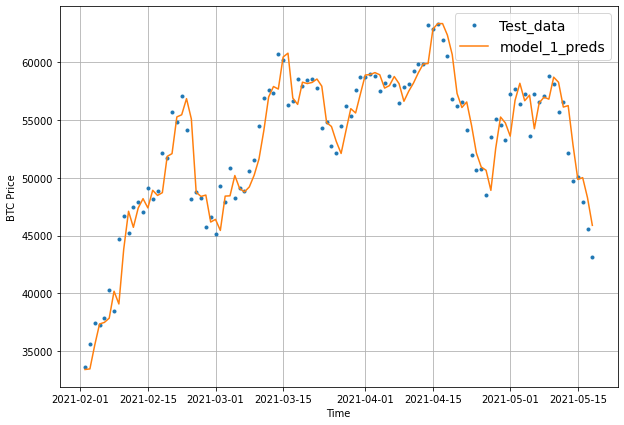

In [ ]:
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)


In [ ]:
HORIZON = 1 
WINDOW_SIZE = 30

In [ ]:
# make windows data with the right horizon and windos size 

full_windows , full_labels = make_windows(prices , window_size= WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)

(2757, 2757)

In [ ]:
#make train and test windows 
train_windows , test_windows , train_labels , test_labels = make_train_test_splits(windows = full_windows,
                                                                                   labels = full_labels,
                                                                                   test_split = 0.2)

len(train_windows), len(train_labels)

(2205, 2205)

In [ ]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 635.6503


635.6502685546875

In [ ]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 613.6450


613.6449584960938

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 1ms/step


In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 613.64496,
 'mse': 1289775.9,
 'rmse': 1135.683,
 'mape': 2.8404734,
 'mase': 1.0726575}

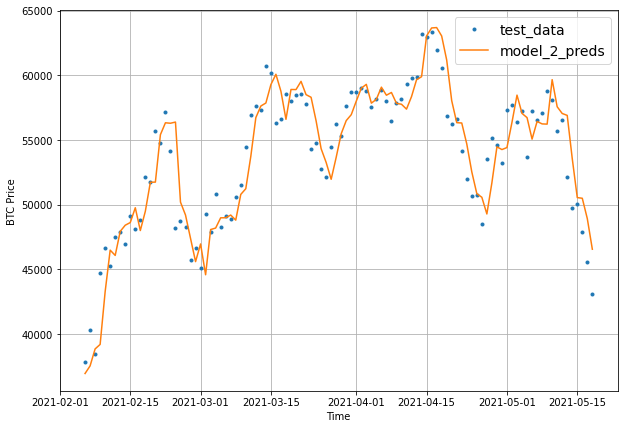

In [ ]:
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds") 

## Model 3: Dense (window = 30, horizon = 7)


In [ ]:
WINDOW_SIZE = 30 
HORIZON = 7 

In [ ]:
full_windows , full_labels = make_windows(prices , window_size= WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, test_windows , train_labels , test_labels = make_train_test_splits(windows = full_windows , labels=full_labels , test_split = 0.2)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)


(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128,activation = "relu"),
    layers.Dense(HORIZON)
],name="model_3_dens")

#compile the model 
model_3.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

#fit the model 
model_3.fit(x=train_windows,
            y= train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_3.name)])

In [ ]:
#evaluate our model 
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1323.9276


1323.9276123046875

In [ ]:
# load best version of model 3 
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dens")

In [ ]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1236.0417


1236.041748046875

In [ ]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9139.25  , 9482.877 , 9477.391 , 9639.608 , 9477.147 , 9478.528 ,
        9641.106 ],
       [8850.883 , 9145.206 , 9144.436 , 9321.053 , 9302.862 , 9340.6455,
        9410.134 ],
       [8760.739 , 8982.387 , 8921.081 , 8904.471 , 9138.991 , 9221.029 ,
        9332.465 ],
       [8844.198 , 9244.226 , 9095.865 , 9018.022 , 9170.847 , 9395.723 ,
        9476.2295],
       [8738.806 , 9086.056 , 9226.871 , 9092.309 , 9014.041 , 9196.56  ,
        9359.79  ]], dtype=float32)>

In [ ]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  683.3433  ,   465.2041  ,   424.5784  ,   551.2783  ,
          554.0244  ,   604.32623 ,   631.54675 ,   650.42303 ,
          526.4539  ,   664.00574 ,   847.8758  ,   832.1528  ,
          936.249   ,   909.7071  ,   616.9688  ,   186.09277 ,
          156.98367 ,   293.34738 ,   305.98373 ,   293.93555 ,
          222.68422 ,   233.25237 ,   403.2193  ,   390.82025 ,
          181.8893  ,   156.18764 ,   152.23367 ,   141.56418 ,
          148.67188 ,   235.09773 ,   359.79053 ,   371.35867 ,
          445.42502 ,   411.2315  ,   337.78354 ,   359.83588 ,
          363.43234 ,   259.79004 ,   244.76555 ,   178.54164 ,
          415.31137 ,   126.06201 ,    82.02135 ,   146.41086 ,
          149.50426 ,   208.44643 ,   129.29492 ,   147.49686 ,
          140.89795 ,   116.12549 ,   108.06306 ,   235.426   ,
          187.88156 ,   187.65584 ,   205.85275 ,   292.16162 ,
          488.72885 ,   498.50873 ,   422.59067 ,   502.17166 ,
          324.83063 ,   169.13121

## Make our evaluation function work for larger horizons


In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_Scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1236.0417,
 'mse': 5389907.0,
 'rmse': 1424.2201,
 'mape': 5.6506767,
 'mase': 2.1994672}

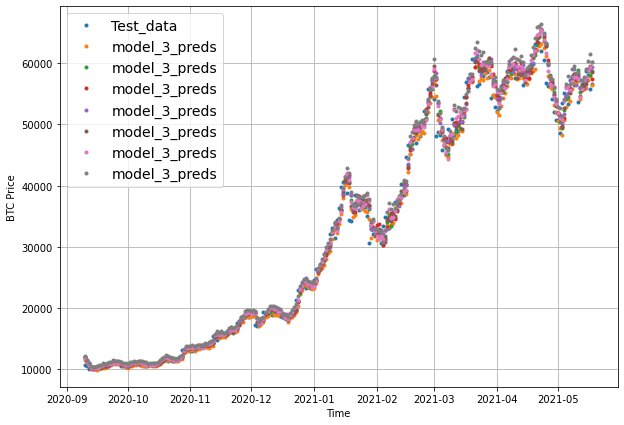

In [ ]:
offset = 300

plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

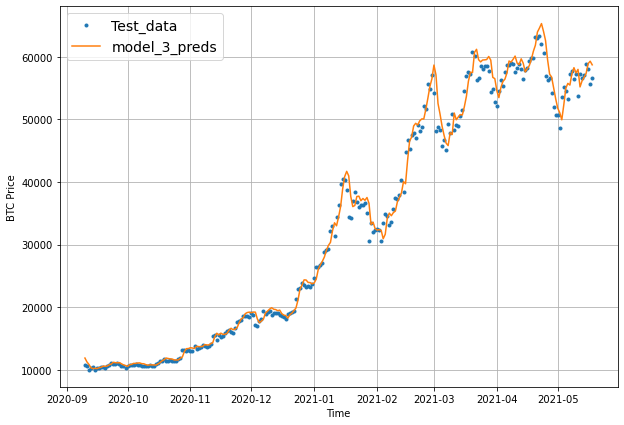

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_3_preds")

### Which of our models is performing best so far?


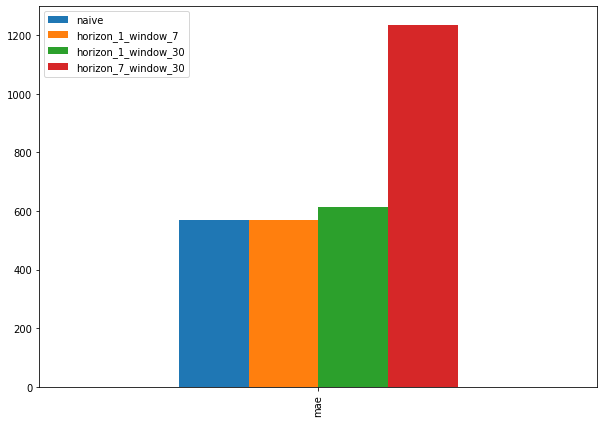

In [ ]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

## Model 4: Conv1D


In [ ]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [ ]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
#check tada input shape 
train_windows[0].shape

(7,)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
tf.random.set_seed(42)

#create Conv1D model 
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis=1)),
    layers.Conv1D(filters = 128 , kernel_size = 5 , strides = 1, padding = "causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_Conv1D")


#compile the model 
model_4.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())



#fit the model 
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4.summary()


Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_Conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 572.4160


572.4159545898438

In [ ]:

# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8858.014, 8771.37 , 8976.553, 8751.929, 8738.256, 8718.45 ,
       8641.883, 8520.521, 8441.672, 8493.394], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 572.4159,
 'mse': 1179193.8,
 'rmse': 1085.9069,
 'mape': 2.560686,
 'mase': 1.0055761}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Model 5: RNN (LSTM)


In [ ]:
tf.random.set_seed(42)

#create LSTM model 
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x,axis = 1))(inputs)
# x = layers.LSTM(128,return_sequences=True)(x)
x = layers.LSTM(128 ,activation="relu")(x)
# x = layers.Dense(32,activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs,outputs=outputs,name="model_5_LSTM")


#compile the model 
model_5.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())


#fit the model 
model_5.fit(train_windows,
            train_labels,
            epochs = 100,
            verbose = 1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 4s 116ms/step - loss: 2165.2627 - val_loss: 8797.8174
Epoch 2/100
18/18 [==============================] - 3s 151ms/step - loss: 675.2377 - val_loss: 2032.5072
Epoch 3/100
18/18 [==============================] - 2s 103ms/step - loss: 259.8727 - val_loss: 1453.5332
Epoch 4/100
18/18 [==============================] - 2s 121ms/step - loss: 204.9192 - val_loss: 1138.1566
Epoch 5/100
18/18 [==============================] - 2s 112ms/step - loss: 199.9234 - val_loss: 1124.3118
Epoch 6/100
18/18 [==============================] - 2s 123ms/step - loss: 198.0732 - val_loss: 1097.9677
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 199.1097 - val_loss: 1103.2916
Epoch 8/100
18/18 [==============================] - 0s 8ms/step - loss: 194.5077 - val_loss: 1105.9116
Epoch 9/100
18/18 [==============================] - 2s 100ms/step - loss: 192.1084 - val_loss: 1093.7892
Epoch 10/100
18/18 [=============================

In [ ]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 581.9772


581.9772338867188

In [ ]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8943.914, 8804.655, 8981.403, 8811.12 , 8759.795, 8755.019,
       8702.628, 8549.999, 8485.776, 8520.341], dtype=float32)>

In [ ]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 581.97723,
 'mse': 1222074.0,
 'rmse': 1105.4746,
 'mape': 2.629848,
 'mase': 1.0223728}

In [ ]:
model_1_results

{'mae': 568.061,
 'mse': 1164492.6,
 'rmse': 1079.1166,
 'mape': 2.544798,
 'mase': 0.9979258}

# Make a multivariate time series


In [ ]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Block reward values
block_reward_1 = 50   # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25   # 8 nov 2012
block_reward_3 = 12.2 #9 jul 2016
block_reward_4 = 6.25 #18 may 2020



# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [ ]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days


(1012, 2414)

In [ ]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None


# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


In [ ]:
bitcoin_prices_block

,Price,block_reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


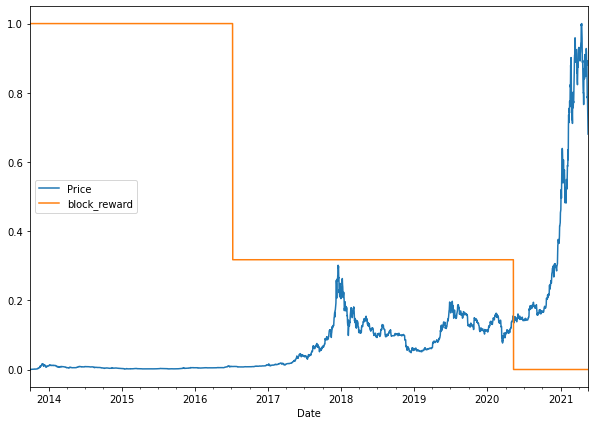

In [ ]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

##Making a windowed dataset with pandas


In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


Window for a week (7) to predict a horizon of 1 (multivariate time series)
WINDOW_SIZE & block_reward -> HORIZON

[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]

[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]

[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]


In [ ]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32) 
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
# View labels
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate time series)


In [ ]:
tf.random.set_seed(42)

#make multivariate timeseries model 
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON)
],name="model_6_dense")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())


model_6.fit(X_train,y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test,y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 12s - loss: 3871.2051

18/18 [==============================] - 1s 34ms/step - loss: 1714.7876 - val_loss: 1943.1448
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 385.2411 - val_loss: 1966.6016
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 270.1800

18/18 [==============================] - 1s 48ms/step - loss: 233.4264 - val_loss: 1291.6184
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 202.3437

18/18 [==============================] - 0s 28ms/step - loss: 200.5748 - val_loss: 1132.0583
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 186.5449

18/18 [==============================] - 1s 40ms/step - loss: 195.7328 - val_loss: 1101.7816
Epoch 6/100
16/18 [=========================>....] - ETA: 0s - loss: 189.1579

18/18 [==============================] - 1s 38ms/step - loss: 189.9976 - val_loss: 1059.3959
Epoch 7/100
14/18 [======================>.......] - ETA: 0s - loss: 192.5502

18/18 [==============================] - 1s 39ms/step - loss: 185.7018 - val_loss: 1002.9080
Epoch 8/100
14/18 [======================>.......] - ETA: 0s - loss: 176.0729

18/18 [==============================] - 1s 33ms/step - loss: 176.8058 - val_loss: 976.6390
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 142.1827

18/18 [==============================] - 0s 27ms/step - loss: 168.0690 - val_loss: 972.8566
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 179.1268

18/18 [==============================] - 0s 27ms/step - loss: 162.8533 - val_loss: 897.0475
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 172.7426

18/18 [==============================] - 0s 26ms/step - loss: 158.6125 - val_loss: 879.2949
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 153.7075 - val_loss: 922.3378
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 125.0225

18/18 [==============================] - 0s 28ms/step - loss: 152.5566 - val_loss: 862.1403
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 166.4219

18/18 [==============================] - 0s 26ms/step - loss: 147.1902 - val_loss: 843.5641
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 146.7178 - val_loss: 887.7892
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 145.0488

18/18 [==============================] - 0s 27ms/step - loss: 143.5261 - val_loss: 833.3046
Epoch 17/100
17/18 [===========================>..] - ETA: 0s - loss: 139.0791

18/18 [==============================] - 0s 28ms/step - loss: 139.4745 - val_loss: 796.4872
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 137.1015 - val_loss: 827.7093
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 86.8197

18/18 [==============================] - 0s 26ms/step - loss: 134.5723 - val_loss: 785.4713
Epoch 20/100
18/18 [==============================] - ETA: 0s - loss: 131.2788

18/18 [==============================] - 0s 27ms/step - loss: 131.2788 - val_loss: 724.8349
Epoch 21/100
18/18 [==============================] - 0s 5ms/step - loss: 133.6822 - val_loss: 727.0756
Epoch 22/100
16/18 [=========================>....] - ETA: 0s - loss: 130.6664

18/18 [==============================] - 1s 29ms/step - loss: 129.6931 - val_loss: 710.0472
Epoch 23/100
18/18 [==============================] - ETA: 0s - loss: 129.0864

18/18 [==============================] - 0s 27ms/step - loss: 129.0864 - val_loss: 691.9240
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 127.7173 - val_loss: 692.5457
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 125.8816

18/18 [==============================] - 0s 27ms/step - loss: 125.8816 - val_loss: 675.6122
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 134.8479

18/18 [==============================] - 0s 25ms/step - loss: 125.3295 - val_loss: 670.7531
Epoch 27/100
18/18 [==============================] - ETA: 0s - loss: 125.1560

18/18 [==============================] - 0s 27ms/step - loss: 125.1560 - val_loss: 652.8714
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 117.5681

18/18 [==============================] - 0s 26ms/step - loss: 120.8318 - val_loss: 644.0538
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 119.0899 - val_loss: 663.0186
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 136.0573

18/18 [==============================] - 1s 48ms/step - loss: 125.7233 - val_loss: 643.6655
Epoch 31/100
14/18 [======================>.......] - ETA: 0s - loss: 119.3866

18/18 [==============================] - 1s 40ms/step - loss: 120.9592 - val_loss: 628.4286
Epoch 32/100
18/18 [==============================] - 0s 8ms/step - loss: 118.4627 - val_loss: 643.7618
Epoch 33/100
18/18 [==============================] - 0s 7ms/step - loss: 117.5644 - val_loss: 656.7901
Epoch 34/100
14/18 [======================>.......] - ETA: 0s - loss: 120.1846

18/18 [==============================] - 1s 47ms/step - loss: 116.7218 - val_loss: 627.5513
Epoch 35/100
12/18 [===================>..........] - ETA: 0s - loss: 117.8225

18/18 [==============================] - 1s 51ms/step - loss: 115.4097 - val_loss: 613.7930
Epoch 36/100
18/18 [==============================] - 0s 7ms/step - loss: 123.2051 - val_loss: 639.0451
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 116.9567 - val_loss: 615.4227
Epoch 38/100
18/18 [==============================] - 0s 7ms/step - loss: 113.8223 - val_loss: 619.8315
Epoch 39/100
16/18 [=========================>....] - ETA: 0s - loss: 116.0163

18/18 [==============================] - 1s 39ms/step - loss: 113.9070 - val_loss: 608.6934
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 112.3076 - val_loss: 629.7611
Epoch 41/100
15/18 [========================>.....] - ETA: 0s - loss: 116.2644

18/18 [==============================] - 1s 35ms/step - loss: 113.1024 - val_loss: 600.5713
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 118.4141 - val_loss: 602.5828
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 112.6179 - val_loss: 602.3303
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 65.3372

18/18 [==============================] - 0s 26ms/step - loss: 111.2651 - val_loss: 596.5918
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 81.5216

18/18 [==============================] - 0s 27ms/step - loss: 110.4458 - val_loss: 592.9589
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8729 - val_loss: 602.4197
Epoch 47/100
 1/18 [>.............................] - ETA: 0s - loss: 102.0776

18/18 [==============================] - 0s 26ms/step - loss: 111.6715 - val_loss: 592.1098
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2090 - val_loss: 691.3934
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 121.2278 - val_loss: 621.3360
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9906 - val_loss: 632.9456
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8299 - val_loss: 597.1159
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 113.2950 - val_loss: 604.7058
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8160 - val_loss: 646.1594
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 107.9237

18/18 [==============================] - 0s 27ms/step - loss: 111.0602 - val_loss: 586.6728
Epoch 55/100
18/18 [==============================] - ETA: 0s - loss: 110.1572

18/18 [==============================] - 1s 31ms/step - loss: 110.1572 - val_loss: 579.7312
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6969 - val_loss: 766.3555
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 115.0074 - val_loss: 598.3935
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 98.4587

18/18 [==============================] - 0s 26ms/step - loss: 109.7531 - val_loss: 577.8328
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 107.7850 - val_loss: 611.3029
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 113.0664 - val_loss: 615.4909
Epoch 61/100
 1/18 [>.............................] - ETA: 0s - loss: 140.1545

18/18 [==============================] - 0s 26ms/step - loss: 108.7525 - val_loss: 575.2435
Epoch 62/100
18/18 [==============================] - ETA: 0s - loss: 106.7622

18/18 [==============================] - 0s 27ms/step - loss: 106.7622 - val_loss: 573.4935
Epoch 63/100
17/18 [===========================>..] - ETA: 0s - loss: 108.8242

18/18 [==============================] - 0s 27ms/step - loss: 108.6317 - val_loss: 571.6257
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 107.3330 - val_loss: 607.6879
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 110.0129 - val_loss: 585.2078
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0225 - val_loss: 579.7766
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 106.5071 - val_loss: 636.0721
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 106.9004 - val_loss: 578.5672
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 108.3350 - val_loss: 656.7484
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 123.4899 - val_loss: 588.0413
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2315 - val_loss: 573.4351
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 11

18/18 [==============================] - 0s 25ms/step - loss: 108.3607 - val_loss: 571.1376
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7513 - val_loss: 573.6987
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 109.6276 - val_loss: 616.9056
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 114.5240 - val_loss: 594.8329
Epoch 77/100
17/18 [===========================>..] - ETA: 0s - loss: 106.5234

18/18 [==============================] - 0s 26ms/step - loss: 105.8504 - val_loss: 569.1030
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 105.4040 - val_loss: 569.7006
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 106.8493 - val_loss: 595.0554
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6611 - val_loss: 569.1128
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 105.8290 - val_loss: 586.9023
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 116.4872 - val_loss: 579.0437
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 113.0149 - val_loss: 706.5901
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 114.3149 - val_loss: 571.6921
Epoch 85/100
 1/18 [>.............................] - ETA: 0s - loss: 86.3851

18/18 [==============================] - 0s 27ms/step - loss: 107.1541 - val_loss: 567.3993
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 107.0742 - val_loss: 569.9266
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 105.0821 - val_loss: 597.4522
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7022 - val_loss: 567.4075
Epoch 89/100
 1/18 [>.............................] - ETA: 0s - loss: 105.9180

18/18 [==============================] - 0s 28ms/step - loss: 109.1790 - val_loss: 565.8995
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 105.0206 - val_loss: 569.9346
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6635 - val_loss: 596.4917
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 108.9349 - val_loss: 624.0554
Epoch 93/100
18/18 [==============================] - 0s 8ms/step - loss: 117.7096 - val_loss: 614.5463
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 113.3142 - val_loss: 582.3810
Epoch 95/100
18/18 [==============================] - 0s 8ms/step - loss: 106.2419 - val_loss: 573.1656
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 105.5903 - val_loss: 568.9514
Epoch 97/100
15/18 [========================>.....] - ETA: 0s - loss: 102.8662

18/18 [==============================] - 1s 37ms/step - loss: 104.7463 - val_loss: 565.3885
Epoch 98/100
18/18 [==============================] - 0s 7ms/step - loss: 105.6260 - val_loss: 579.3585
Epoch 99/100
18/18 [==============================] - 0s 7ms/step - loss: 105.9884 - val_loss: 574.4123
Epoch 100/100
18/18 [==============================] - 0s 7ms/step - loss: 107.6657 - val_loss: 568.6011


In [ ]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_dense")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 565.3884


565.3883666992188

In [ ]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8828.3  , 8764.253, 9026.616, 8759.343, 8745.216, 8725.55 ,
       8672.365, 8491.636, 8461.771, 8511.935], dtype=float32)>

In [ ]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 565.38837,
 'mse': 1152206.4,
 'rmse': 1073.4087,
 'mape': 2.5430822,
 'mase': 0.99323076}

In [ ]:
model_1_results


{'mae': 568.061,
 'mse': 1164492.6,
 'rmse': 1079.1166,
 'mape': 2.544798,
 'mase': 0.9979258}

## Model 7: N-BEATS algorithm


### Building and testing an N-BEATS block layer


In [ ]:
# #create NBeatsBlock custom layer 
# class NBeatsBlock(tf.keras.layers.Layer):
#   def __int__(self,
#               input_size: int,
#               theta_size: int,
#               horizon: int,
#               n_neurons: int,
#               n_layers: int,
#               **kwargs):
#     super().__int__(**kwargs)
#     self.input_size = input_size
#     self.theta_size = theta_size
#     self.horizon = horizon
#     self.n_neurons = n_neurons
#     self.n_layers = n_layers

#     # Block contains stack of 4 fully connected layers each has RelU activation 
#     self.hidden = [tf.keras.layers.Dense(n_neurons,activation="relu") for _ in range(n_layers)]
#     #output of block is a theta layer with linear activation 
#     self.theta_layer = tf.keras.layers.Dense(theta_size , activation = "linear", name="theta")

#   def call(self,inputs):
#     x = inputs
#     for layer in self.hidden: # pass inputs through each hidden layer 
#       x = layer(x)
#     theta = self.theta_layer(x)
#     # Output the backcast and forecast from theta 
#     backcast , forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
#     return backcast, forecast 


In [ ]:
# Create NBeatsBlock custom layer 
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.696499   -0.27171612  0.1986329   0.23418802 -0.08133662  1.6919389
  0.00580442]
Forecast: 0.01586104929447174


### Preparing data for the N-BEATS algorithm using tf.data


In [ ]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [ ]:
# Create NBEATS data inputs (NBEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)

bitcoin_prices_nbeats.head(10)

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
# make features and labels 
X = bitcoin_prices_nbeats.dropna().drop("Price",axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]



In [ ]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# time to make our dataset performat using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

#combine labels and features by zipping together -> (features , labels)
train_dataset =tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

#batch and prefetch
BATCH_SIZE = 1028
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset , test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm


In [ ]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections
before we create the N-BEATS model, there are two layers to go through which play a large roll in the architecture.



*   tf.keras.layers.subtract(inputs) - subtracts list of input tensors from each other

*   tf.keras.layers.add(inputs) - adds list of input tensors to each other


They're what make N-BEATS **double residual stacking**


In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


###Building, compiling and fitting the N-BEATS algorithm



1. Setup an instance of the N-BEATS block layer using NBeatsBlock (this'll be the initial block used for the network, the rest will be created as part of stacks)

2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API for this)

3. Make the initial backcast and forecasts for the model with the layer created in (1)

4. Use a for loop to create stacks of block layers

5. Use the NBeatsBlock class within the for loop created in (4) to create blocks which return backcasts and block-level forecasts

6. Create the double residual stacking using subtract and add layers

7. Put the model inputs and outputs together using tf.keras.Model()

8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default settings as per section 5.2 of N-BEATS paper)

9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
  

  *   tf.keras.callbacks.EarlyStopping() - stop the model from training if it doesn't improve validation loss for 200 epochs and restore the best performing weights using restore_best_weights=True (this'll prevent the model from training for loooongggggg period of time without improvement)
  *   tf.keras.callbacks.ReduceLROnPlateau() - if the model's validation loss doesn't improve for 100 epochs, reduce the learning rate by 10x to try and help it make incremental improvements (the smaller the learning rate, the smaller updates a model tries to make)















In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup an instance of the N-BEATS block 
nbeats_block_layer = NBeatsBlock(input_size= INPUT_SIZE,
                                 theta_size= THETA_SIZE,
                                 horizon = HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers = N_LAYERS,
                                 name="InitialBlock")


# 2. Create an input layer for the N-BEATS stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")


# 3. Make the initial backcast and forecasts for the model with the layer created in (1)
residuals, forecast = nbeats_block_layer(stack_input)



# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. put the stack model together 
model_7 = tf.keras.Model(inputs = stack_input, outputs=forecast, name="model_7_NBEATS")


# 8. cimpile the model 
model_7.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())


# 9. fit the model 
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data= test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 900: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1000: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 3min 44s, sys: 7.27 s, total: 3min 51s
Wall time: 4min 20s


In [ ]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 19ms/step - loss: 573.6262


573.6261596679688

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8870.444, 8800.596, 9030.572, 8775.507, 8750.626, 8748.756,
       8666.661, 8531.574, 8471.699, 8523.207], dtype=float32)>

In [ ]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 573.62616,
 'mse': 1187097.9,
 'rmse': 1089.5402,
 'mape': 2.5767612,
 'mase': 1.0077022}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
model_1_results

{'mae': 568.061,
 'mse': 1164492.6,
 'rmse': 1079.1166,
 'mape': 2.544798,
 'mase': 0.9979258}

### Plotting the N-BEATS architecture we've created


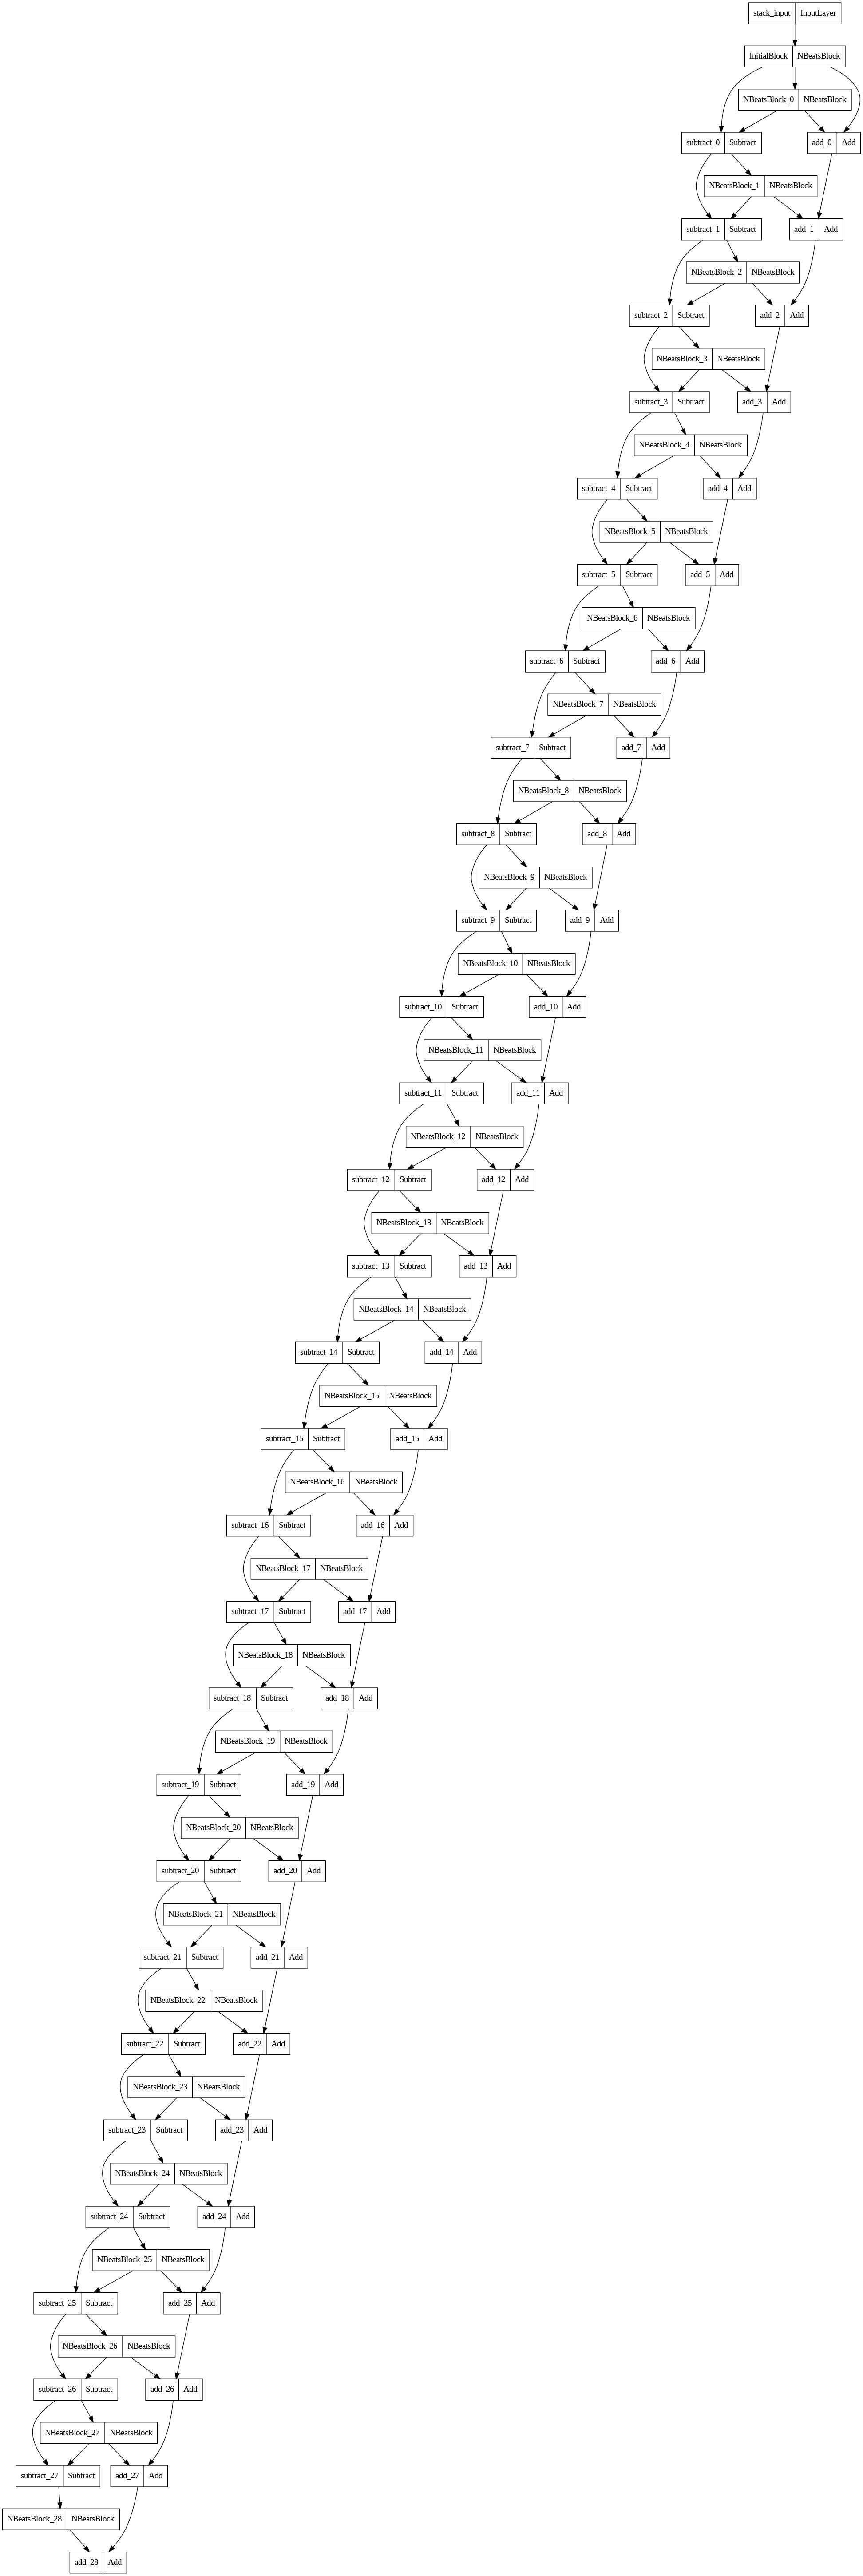

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

An ensemble involves training and combining multiple different models on the same problem. Ensemble models are often the types of models you'll see winning data science competitions on websites like Kaggle.

### Constructing and fitting an ensemble of models (using different loss functions)


In [ ]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 228: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 612: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 712: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 203: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 664: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 770: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 870: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 411: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 511: ReduceLROnPl

### Making predictions with an ensemble model


In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 37ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8751.839 ,  8723.32  ,  9056.413 , ..., 51162.598 , 48824.113 ,
        45830.31  ],
       [ 8780.168 ,  8833.182 ,  9111.846 , ..., 50372.58  , 48435.875 ,
        45885.754 ],
       [ 8801.415 ,  8774.106 ,  9062.339 , ..., 49939.152 , 48764.105 ,
        46600.83  ],
       ...,
       [ 8789.303 ,  8801.006 ,  9136.361 , ..., 50775.336 , 48741.19  ,
        46158.555 ],
       [ 8794.1045,  8758.139 ,  9073.294 , ..., 49737.312 , 48665.492 ,
        45723.457 ],
       [ 8778.811 ,  8836.295 ,  9106.885 , ..., 49866.195 , 47791.812 ,
        45219.86  ]], dtype=float32)>

In [ ]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 569.7459,
 'mse': 1149665.8,
 'rmse': 1072.2246,
 'mape': 2.5619757,
 'mase': 1.0008857}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble


In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks
  
  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)
  
  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96 

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95% 
lower, upper = get_upper_lower(preds=ensemble_preds)

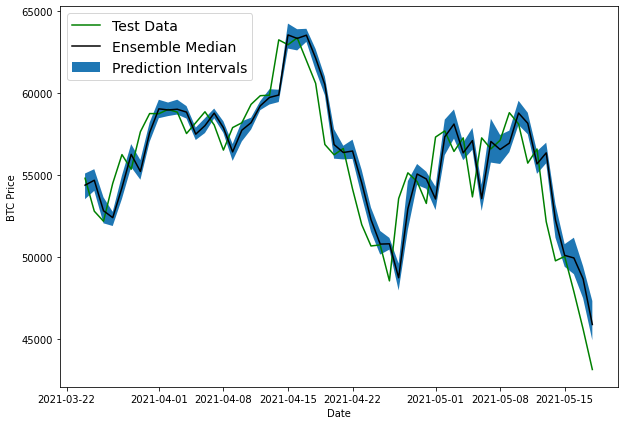

In [ ]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
9plt.legend(loc="upper left", fontsize=14);

## Model 9: Train a model on the full historical data to make predictions into future


In [ ]:
bitcoin_prices_windowed.head(10)



,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
# train model on the entire data to make predictions for the next day 
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis = 1).to_numpy()
#get labels 
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()


len(X_all), len(y_all)

(2780, 2780)

In [ ]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

#create model 
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation ="relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON)
],name="model_9")


#compile the model 
model_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

#fit the model 
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)